In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('State&District_Nodate.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SlNo             800 non-null    int64  
 1   State_Code       800 non-null    object 
 2   State            800 non-null    object 
 3   District_Key     800 non-null    object 
 4   District         800 non-null    object 
 5   Confirmed        800 non-null    int64  
 6   Active           800 non-null    int64  
 7   Recovered        800 non-null    int64  
 8   Deceased         800 non-null    int64  
 9   Migrated_Other   800 non-null    int64  
 10  Delta_Confirmed  800 non-null    int64  
 11  Delta_Active     800 non-null    int64  
 12  Delta_Recovered  800 non-null    int64  
 13  Delta_Deceased   800 non-null    int64  
 14  District_Notes   60 non-null     object 
 15  Last_Updated     0 non-null      float64
dtypes: float64(1), int64(10), object(5)
memory usage: 100.1+ KB


In [5]:
df.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


In [6]:
df.isnull().sum()/len(df)*100

SlNo                 0.0
State_Code           0.0
State                0.0
District_Key         0.0
District             0.0
Confirmed            0.0
Active               0.0
Recovered            0.0
Deceased             0.0
Migrated_Other       0.0
Delta_Confirmed      0.0
Delta_Active         0.0
Delta_Recovered      0.0
Delta_Deceased       0.0
District_Notes      92.5
Last_Updated       100.0
dtype: float64

In [7]:
#since there are more than 90% percentage of data missing in the District_Notes and Last_Updated  column we are droppping it
df.drop(['District_Notes','Last_Updated'],axis=1,inplace=True)

In [8]:
#checking for duplicate values
df[df.duplicated()]

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased


In [9]:
num_col=df.select_dtypes(np.number)

In [10]:
#removing negative values 
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for ind in df[col].index:
        if  df.loc[ind,col]<=ll:
            df.loc[ind,col]=ll
        else:
            pass

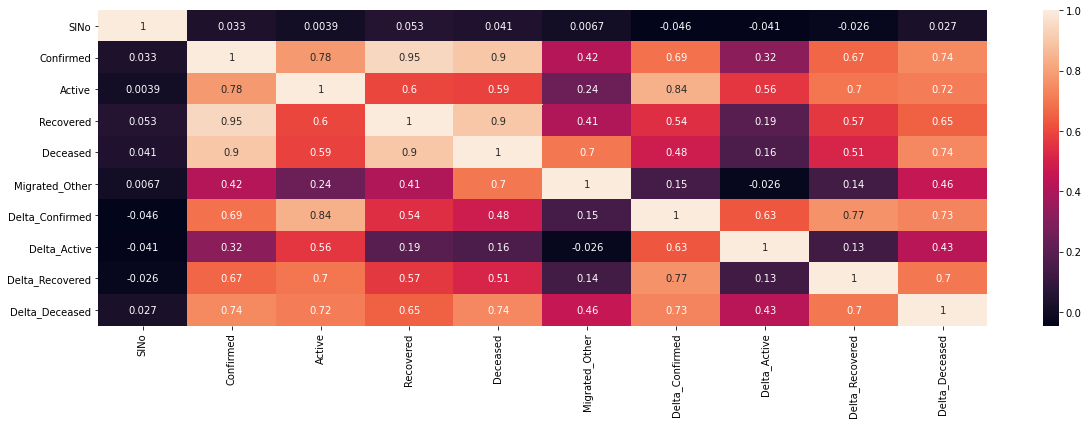

In [11]:
plt.figure(figsize=[17,6])
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
#checking for relationship between the data

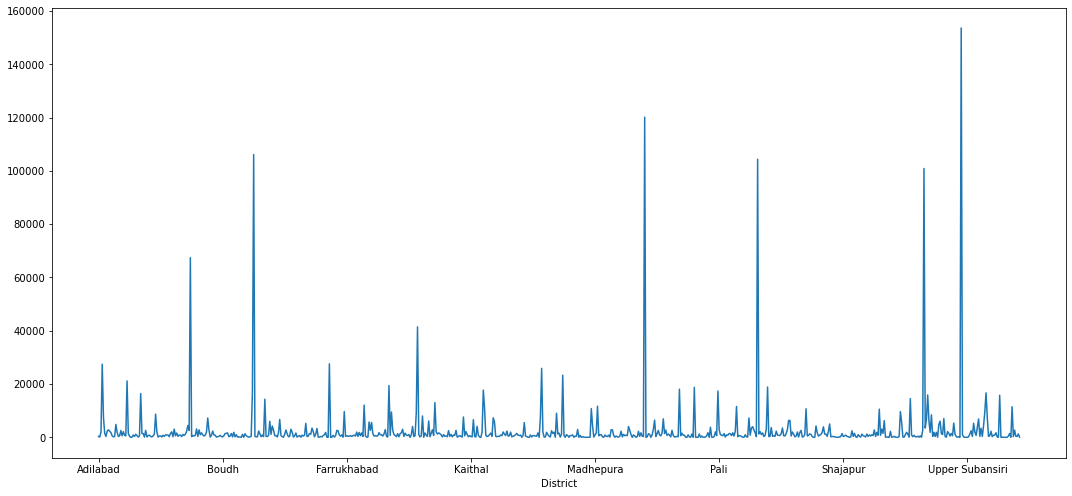

In [12]:
df.groupby(['District'])['Confirmed'].sum().plot(kind='line',figsize=[15,7])
plt.tight_layout()
#this plot shows the states with the increase in covid cases how ever there are other states which are taken into consideration in this plot only few are visible

In [13]:
#here lets take 2 variables as our target variable we are merging them together as one the variabels we are considering are Confirmed and Delta confirmed columns

In [14]:
a=df.groupby('District')['Confirmed'].sum()

In [15]:
a.drop(index='Unknown',inplace=True)

<AxesSubplot:xlabel='District'>

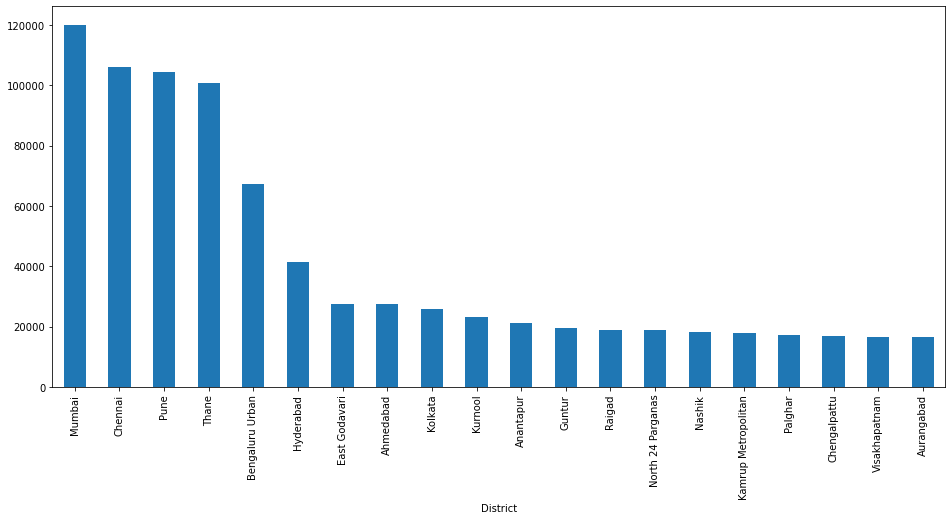

In [16]:
#infrence (8)
plt.figure(figsize=[16,7])
a.sort_values(ascending=False).head(20).plot(kind='bar')

In [17]:
#this plot shows the most covid cases contributing districts the unknown district might me of the state Maharastra or other districts included

In [18]:
df['total_confirmed_cases']=df['Confirmed']+df['Delta_Confirmed']

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delta_Confirmed', ylabel='Delta_Deceased'>

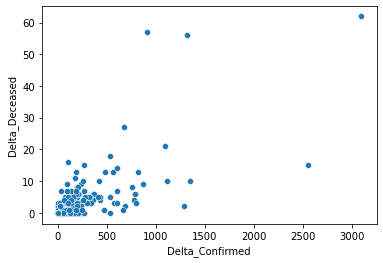

In [19]:
#infrence (9)
sns.scatterplot(df['Delta_Confirmed'],df['Delta_Deceased'])
#this shows as the number of  delta varient cases increases deathes also increases

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Confirmed', ylabel='Deceased'>

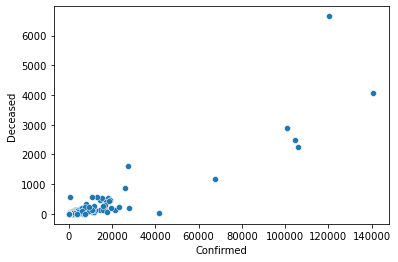

In [20]:
#infrence(10)
sns.scatterplot(df['Confirmed'],df['Deceased'])
#even this graph shows as the cases increases the number of deathes increases but the number of cases and deaths are comparatively lower to the Delta varient cases

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delta_Confirmed', ylabel='Migrated_Other'>

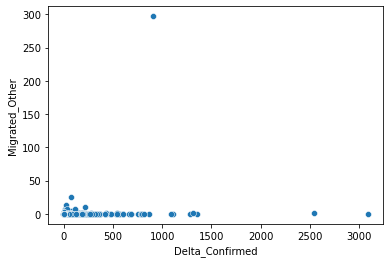

In [21]:
sns.scatterplot(df['Delta_Confirmed'],df['Migrated_Other'])
#as we see there is only a less amount of people who  have migrathed have  covid 

So doing Some Statistical Analasis on the Target variable .

Hypothesis: H0:Average Total_confirmed_cases <=4600

HA: Average Total_confirmed_cases >4600

In [22]:
#lets take alpha values as 0.05 as for owr buisness need 
alpha=0.05

In [23]:
import scipy.stats as st

In [24]:
#here we are doing a T test because we assume this  data is a sample from a population
xbar=df['total_confirmed_cases'].mean()
s=df['total_confirmed_cases'].std(ddof=1)
mue=4600
n=len(df['total_confirmed_cases'])
se=s/np.sqrt(n)
t_stat=(xbar-mue)/se#t test 
t_critic=st.t.isf(alpha,n-1)

In [25]:
#p value for the t test
p_value=st.t.cdf(t_stat,n-1)

In [26]:
#critical value approch
st.t.interval(1-alpha,n-1,xbar,se)
#with 95% confidence interval say that the average total cases lies between 1906 and 3305

(1906.074532698952, 3305.9854673010486)

In [27]:
print(p_value,t_stat,t_critic)

1.542585526387799e-08 -5.591839184302465 1.6467629488085243


Since P value is less than alpha we fail  reject H0 so this says on average the Total confirmed cases are 4600 every year but as we increase the Average cases to a 5000 and more the p value decreases and there are significantly the amount of cases also increases cases  

Building a model with Total Confirmed Cases as are (target Variable) and Other variables are independent.

Since owr Target variable is Continious we will be doing a Regression Analysis.

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [29]:
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [30]:
df['Total_Active']=df['Active']+df['Delta_Active']
df['Total_Recovered']=df['Recovered']+df['Delta_Recovered']
df['Total_Deceased']=df['Deceased']+df['Delta_Deceased']

In [31]:
#dropping the insignificant columns 
X=df.drop(['SlNo','State_Code','State','District_Key','Confirmed','Delta_Confirmed','total_confirmed_cases','Active','Recovered','Deceased','Delta_Active','Delta_Deceased','Delta_Recovered'],axis=1)

In [32]:
#here total confirmed cases is a merge of confirmed and delta confirmed cases
y=df['total_confirmed_cases']

In [33]:
cat_col=pd.get_dummies(df['District'],drop_first=True)
num_col=X.drop('District',axis=1)

In [34]:

X=pd.concat([cat_col,num_col],axis=1)
sm_X=sm.add_constant(X)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(sm_X,y,test_size=0.3,random_state=101)
#so we are splitting the data into train and test with test size 0.3

In [36]:
#building a basic model

model=sm.OLS(y_train,X_train).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     total_confirmed_cases   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.984
Method:                    Least Squares   F-statistic:                     65.87
Date:                   Sun, 12 Jun 2022   Prob (F-statistic):           3.11e-27
Time:                           19:29:29   Log-Likelihood:                -4030.1
No. Observations:                    560   AIC:                             9106.
Df Residuals:                         37   BIC:                         1.137e+04
Df Model:                            522                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -188.9876   1325.667     -0.143      0.887   -2875.044    2497.069
Agar Malwa                  105.1049   1822.479      0.058      0.954   -3587.588    3797.798
Agra                      -1.571e-07   1.91e-07     -0.823      0.416   -5.44e-07     2.3e-07
Ahmedabad                 -4.067e+04   3363.444    -12.093      0.000   -4.75e+04   -3.39e+04
Ahmednagar                  434.5256   3956.585      0.110      0.913   -7582.276    8451.327
Airport Quarantine          950.5891   1550.348      0.613      0.544   -2190.714    4091.892
Aizawl                     4.934e-08   4.53e-07      0.109      0.914   -8.68e-07    9.67e-07
Ajmer                       -16.5379   1779.252     -0.009      0.993   -3621.645    3588.569
Akola                     -4.156e-07   2.19e-06     -0.190      0.851   -4.85e-06    4.02e-06
Alappuzha                  -1.13e+04   5473.960     -2.065      0.046   -2.24e+04    -212.938
Aligarh                    -526.5557   1954.883     -0.269      0.789   -4487.525    3434.413
Alipurduar                  2.05e-08   1.44e-07      0.142      0.888   -2.71e-07    3.12e-07
Alirajpur                   282.8763   1809.447      0.156      0.877   -3383.412    3949.164
Almora                    -1577.5202   2224.545     -0.709      0.483   -6084.876    2929.836
Alwar                      1420.8243   3132.890      0.454      0.653   -4927.013    7768.662
Ambala                     1372.5950   1777.960      0.772      0.445   -2229.894    4975.084
Ambedkar Nagar              -76.2536   1800.154     -0.042      0.966   -3723.713    3571.205
Amethi                     4.437e-12   3.81e-10      0.012      0.991   -7.68e-10    7.77e-10
Amravati                  -1601.2297   1816.402     -0.882      0.384   -5281.611    2079.151
Amreli                      139.3328   1784.183      0.078      0.938   -3475.766    3754.432
Amritsar                  -1511.4599   1791.138     -0.844      0.404   -5140.651    2117.731
Amroha                      169.3967   1778.607      0.095      0.925   -3434.403    3773.196
Anand                     -3.382e-11   1.89e-09     -0.018      0.986   -3.86e-09    3.79e-09
Anantapur                  1.195e+04   7971.117      1.499      0.142   -4198.458    2.81e+04
Anantnag                    451.9462   1778.179      0.254      0.801   -3150.987    4054.879
Angul                       411.6553   1794.130      0.229      0.820   -3223.598    4046.909
Anjaw                       194.7195   1826.508      0.107      0.916   -3506.138    3895.576
Anuppur                     284.3742   1823.889      0.156      0.877   -3411.175    3979.924
Araria                      276.9647   1781.890      0.155      0.877   -3333.487    3887.417
Aravalli                   -472.1719   184

In [38]:
#predicting the train data to check the performance
y_train_predicted=model.predict(X_train)
#calculating the MAE for the train data
mse=mean_squared_error(y_train,y_train_predicted)
#calculating the RMSE
np.sqrt(mse)

322.99379186702515

In [39]:
#predicting the test data to check the performance
y_test_predicted=model.predict(X_test)
#calculating the MAE for the test data
mse=mean_squared_error(y_test,y_test_predicted)
#calculating the RMSE
np.sqrt(mse)

51097.24722328969

Since there is significant change in the RMSE score between the train and test score we can say that the model is overfitting and there is a Rsquare value of 1 we cant also say this model is incorrectly predicted or orver fitted data

<AxesSubplot:>

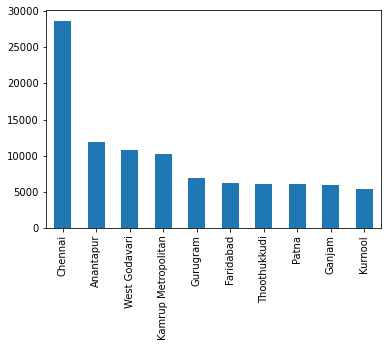

In [40]:
#infering the coefficnents
a=model.params
a.sort_values(ascending=False).head(10).plot(kind='bar')
#these are the top contributing Districts in terms of coefficients

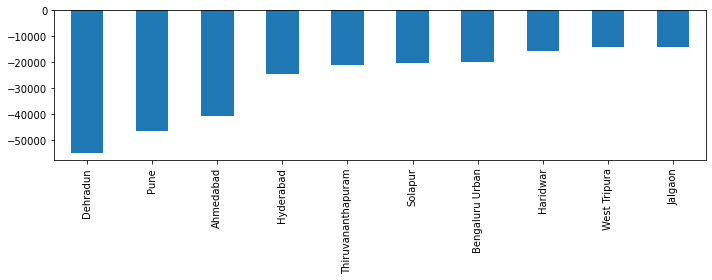

In [41]:
plt.figure(figsize=[10,4])
a.sort_values(ascending=True).head(10).plot(kind='bar')
plt.tight_layout()
#these are the  top 10 Districts which coefficent in negative values 

In [42]:
a=df.groupby(['State','District'])['Confirmed'].sum()

In [43]:
a.sort_values(ascending=False)

State           District    
Delhi           Unknown         140743
Maharashtra     Mumbai          120150
Tamil Nadu      Chennai         106096
Maharashtra     Pune            104353
                Thane           100875
                                 ...  
Madhya Pradesh  Other Region         0
Lakshadweep     Unknown              0
                Lakshadweep          0
Ladakh          Unknown              0
Madhya Pradesh  Unknown              0
Name: Confirmed, Length: 800, dtype: int64

In [44]:
mah=df[df['State']=='Maharashtra']

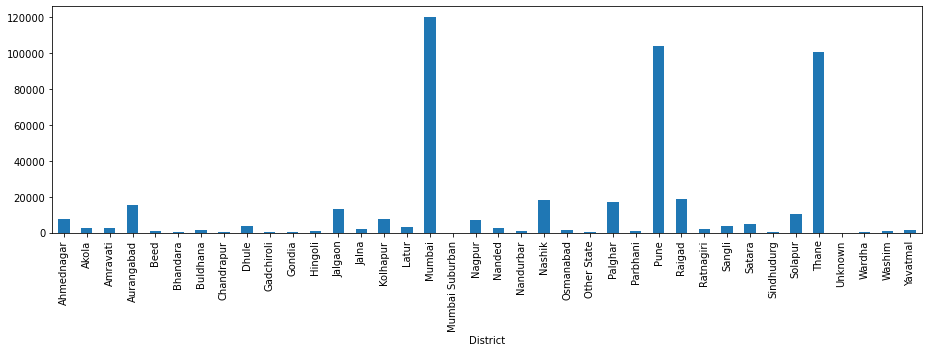

In [45]:
#infrence (6)
plt.figure(figsize=[13,5])
mah.groupby('District')['Confirmed'].sum().plot(kind='bar')
plt.tight_layout()

In [46]:
a=mah.groupby('District')['Confirmed'].sum()

<AxesSubplot:xlabel='District'>

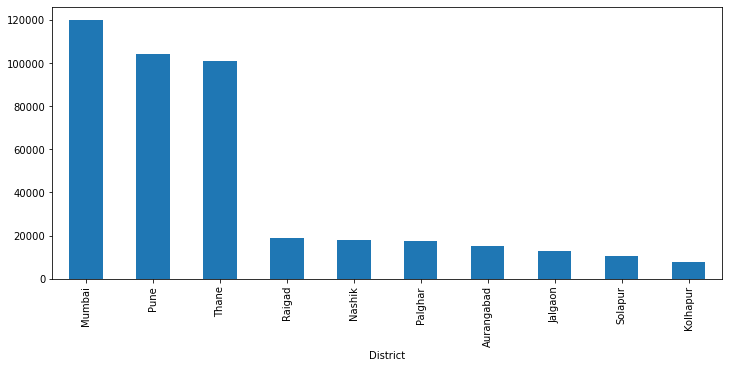

In [47]:
#infrence (7)
plt.figure(figsize=[12,5])
a.sort_values(ascending=False).head(10).plot(kind='bar')